## 목차

 1. [데이터 로딩](#1.-데이터-로딩)
 

 2. [데이터 확인](#2.-데이터-확인)
 

 3. [1차 데이터 병합 및 통계적 분석](#3.-1차-데이터-병합-및-통계적-분석) <br>
    a. [데이터병합 1](#a.-데이터병합-1)<br>
    b. [기초통계분석 1](#b.-기초통계분석-1)<br>
    c. [도시 단위 그룹분석 1](#c.도시-단위-그룹분석-1)<br>
    
    
 4. [2차 데이터 병합 및 통계적 분석](#4.-2차-데이터-병합-및-통계적-분석) <br>
    a. [데이터병합 2](#a.-데이터병합-2)<br>
    b. [기초통계분석 2](#b.-기초통계분석-2)<br>
    
    
 5. [주식, 환율 데이터 분석](#5.-주식,-환율-데이터-분석)
 
 
※ 다음 :<a href="./2_modeling.ipynb"> ☞ 2번째 파일 바로가기 <a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## 1. 데이터 로딩

In [2]:
busan_2017 = pd.read_csv("../input/busan_2017.csv", encoding="cp949")
busan_2018 = pd.read_csv("../input/busan_2018.csv", encoding="cp949")
busan_2019 = pd.read_csv("../input/busan_2019.csv", encoding="cp949")

In [3]:
seoul_2017 = pd.read_csv("../input/seoul_2017.csv", encoding="cp949")
seoul_2018 = pd.read_csv("../input/seoul_2018.csv", encoding="cp949")
seoul_2019 = pd.read_csv("../input/seoul_2019.csv", encoding="cp949")

## 2. 데이터 확인

In [4]:
busan_2017[:3]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,72.5242,201710,1,20500,6,2017,화전산업대로 272-9
1,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,72.5242,201710,2,20500,3,2017,화전산업대로 272-9
2,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,62.2475,201710,24,19000,5,2017,화전산업대로 272-9


In [5]:
seoul_2017[:3]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201703,15,80000,7,1988,언주로 103
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201704,19,85000,2,1988,언주로 103
2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201707,8,89900,1,1988,언주로 103


In [6]:
print("부산 2017년 (행, 열) :" , busan_2017.shape)
print("부산 2018년 (행, 열) :" , busan_2018.shape)
print("부산 2019년 (행, 열) :" , busan_2019.shape)
print("서울 2017년 (행, 열) :" , seoul_2017.shape)
print("서울 2018년 (행, 열) :" , seoul_2018.shape)
print("서울 2019년 (행, 열) :" , seoul_2019.shape)
print(busan_2017.columns)

부산 2017년 (행, 열) : (37938, 12)
부산 2018년 (행, 열) : (25846, 12)
부산 2019년 (행, 열) : (35830, 12)
서울 2017년 (행, 열) : (105076, 12)
서울 2018년 (행, 열) : (81388, 12)
서울 2019년 (행, 열) : (74850, 12)
Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')


In [7]:
print("#### 부산지역 2017 ~ 2019 ####"), print()
print( busan_2017.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) ), print()
print( busan_2018.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) ), print()
print( busan_2019.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) )

#### 부산지역 2017 ~ 2019 ####

mean     26944.340187
std      17143.249410
min       1217.000000
50%      23000.000000
max     379840.000000
Name: 거래금액(만원), dtype: float64

mean     27114.270177
std      17272.376753
min       1200.000000
50%      23200.000000
max     414340.000000
Name: 거래금액(만원), dtype: float64

mean     31419.382947
std      20323.239152
min       1000.000000
50%      26052.000000
max     379840.000000
Name: 거래금액(만원), dtype: float64


In [8]:
print("#### 서울지역 2017 ~ 2019 ####"), print()
print( seoul_2017.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) ), print()
print( seoul_2018.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) ), print()
print( seoul_2019.loc[:, "거래금액(만원)"].describe().drop(index=['count','25%','75%']) )

#### 서울지역 2017 ~ 2019 ####

mean     61912.789971
std      42188.141137
min       6100.000000
50%      50700.000000
max     780000.000000
Name: 거래금액(만원), dtype: float64

mean     65856.956357
std      47587.763910
min       6000.000000
50%      53000.000000
max     810000.000000
Name: 거래금액(만원), dtype: float64

mean     81981.791703
std      57493.801207
min       5400.000000
50%      67000.000000
max     840000.000000
Name: 거래금액(만원), dtype: float64


## 3. 1차 데이터 병합 및 통계적 분석

### a. 데이터병합 1

In [9]:
busan = pd.concat([busan_2017, busan_2018, busan_2019]) # 부산 병합
seoul = pd.concat([seoul_2017, seoul_2018, seoul_2019]) # 서울 병합

In [10]:
b_dict = { 'price' : busan['거래금액(만원)'],
          'city' : busan['시군구'],
          'se' : busan['단지명'],
          'area' : busan['전용면적(㎡)'],
          'mon' : busan['계약년월'],
          'day' : busan['계약일'],
          'floor' : busan['층'],
          'build' : busan['건축년도'] }

s_dict = { 'price' : seoul['거래금액(만원)'],
          'city' : seoul['시군구'],
          'se' : seoul['단지명'],
          'area' : seoul['전용면적(㎡)'],
          'mon' : seoul['계약년월'],
          'day' : seoul['계약일'],
          'floor' : seoul['층'],
          'build' : seoul['건축년도'] }

busan = pd.DataFrame(b_dict)
seoul = pd.DataFrame(s_dict)

busan.reset_index(drop=True, inplace=True)
seoul.reset_index(drop=True, inplace=True)
print("index reset 완료")

index reset 완료


In [11]:
print(busan.shape)
busan.tail(3)

(99614, 8)


,price,city,se,area,mon,day,floor,build
99611,12000,부산광역시 해운대구 중동,현우산호맨션,44.22,201910,5,3,1987
99612,22700,부산광역시 해운대구 중동,협진태양,59.90,201911,9,13,1995
99613,17000,부산광역시 해운대구 중동,협진태양,59.90,201912,9,2,1995


In [12]:
print(seoul.shape)
seoul.tail(3)

(261314, 8)


,price,city,se,area,mon,day,floor,build
261311,25800,서울특별시 중랑구 중화동,한영(102),57.18,201905,20,6,2003
261312,34500,서울특별시 중랑구 중화동,현대휴앤미,82.17,201901,31,7,2007
261313,32800,서울특별시 중랑구 중화동,현대휴앤미(102동),64.48,201907,15,3,2007


### b. 기초통계분석 1

In [13]:
# 부산 서울 부동산가격 통계분석
print("<<< 부산 가격 >>>")
print( busan.loc[:, 'price'].describe().drop(index=['count','25%','75%']) ), print()
print("<<< 서울 가격 >>>")
print( seoul.loc[:, 'price'].describe().drop(index=['count','25%','75%']) )

<<< 부산 가격 >>>
mean     28598.051439
std      18503.178611
min       1000.000000
50%      24200.000000
max     414340.000000
Name: price, dtype: float64

<<< 서울 가격 >>>
mean     68889.731863
std      49389.791658
min       5400.000000
50%      55000.000000
max     840000.000000
Name: price, dtype: float64


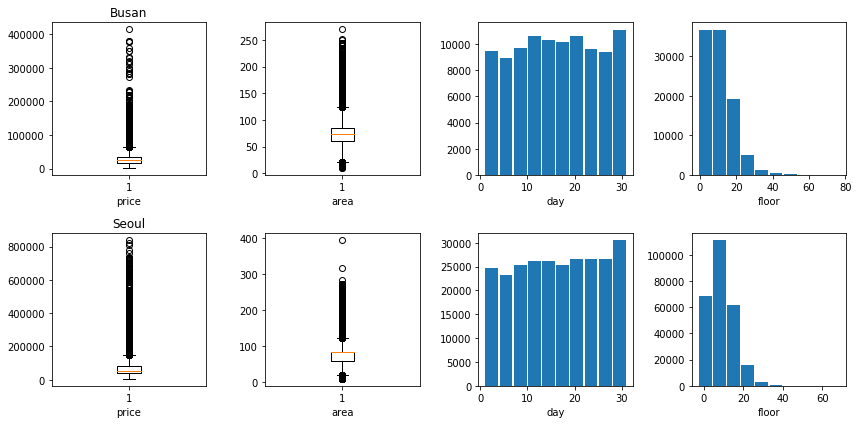

<<< 부산 면적 >>>
min      9.260
25%     59.460
50%     73.560
75%     84.965
max    269.680
Name: area, dtype: float64

<<< 서울 면적 >>>
min     10.020
25%     59.790
50%     84.320
75%     84.975
max    395.060
Name: area, dtype: float64


In [14]:
plt.figure(figsize=(12,6))

plt.subplot(241)
plt.title("Busan")
plt.boxplot(busan['price'])
plt.xlabel("price")

plt.subplot(242)
plt.boxplot(busan['area'])
plt.xlabel("area")

plt.subplot(243)
plt.hist(busan['day'], rwidth=0.9)
plt.xlabel("day")

plt.subplot(244)
plt.hist(busan['floor'], rwidth=0.9)
plt.xlabel("floor")

plt.subplot(245)
plt.title("Seoul")
plt.boxplot(seoul['price'])
plt.xlabel("price")

plt.subplot(246)
plt.boxplot(seoul['area'])
plt.xlabel("area")

plt.subplot(247)
plt.hist(seoul['day'], rwidth=0.9)
plt.xlabel("day")

plt.subplot(248)
plt.hist(seoul['floor'], rwidth=0.9)
plt.xlabel("floor")

plt.tight_layout()
plt.show()

print("<<< 부산 면적 >>>")
print( busan.loc[:, 'area'].describe().drop(index=['count','mean','std']) ), print()
print("<<< 서울 면적 >>>")
print( seoul.loc[:, 'area'].describe().drop(index=['count','mean','std']) )

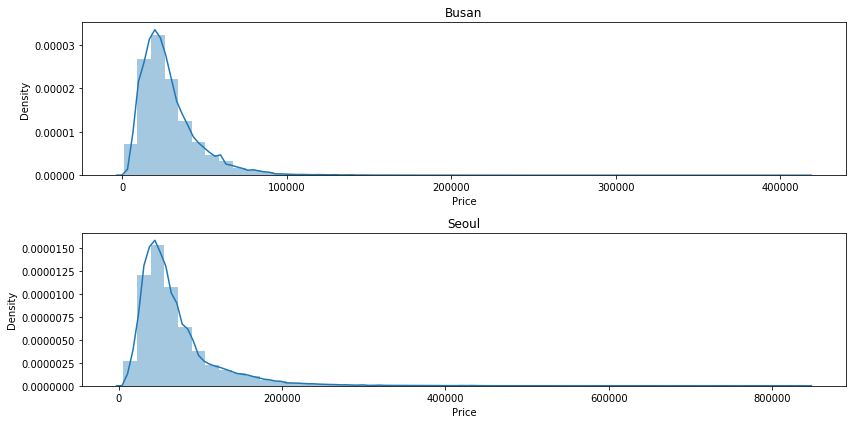

왜도 :  2.801247120211165 : 오른쪽으로 긴 꼬리, (정규분포 = 3)
첨도 :  22.07795800472629 : 양의 첨도(뾰족)


In [15]:
plt.figure(figsize=(12,6))

plt.subplot(211)
ax1 = sns.distplot(busan.loc[:,"price"], bins=50)
ax1.set_title("Busan")
ax1.set_xlabel("Price")
ax1.set_ylabel("Density")

plt.subplot(212)
ax2 = sns.distplot(seoul.loc[:,"price"], bins=50)
ax2.set_title("Seoul")
ax2.set_xlabel("Price")
ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()

#sns초기화
sns.set()
sns.reset_orig()

print("왜도 : ",busan.loc[:,"price"].skew(), ": 오른쪽으로 긴 꼬리, (정규분포 = 3)")
print("첨도 : ",busan.loc[:,"price"].kurt(), ": 양의 첨도(뾰족)")

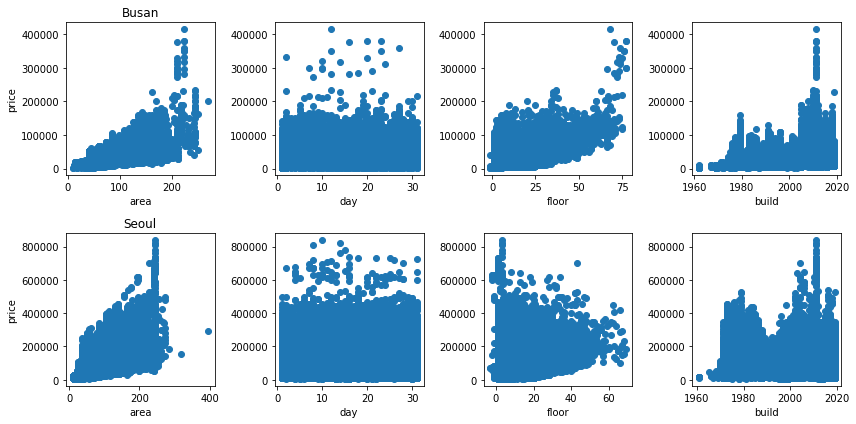

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(241)
plt.title("Busan")
plt.scatter(busan.loc[:,"area"],busan.loc[:,"price"])
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(242)
plt.scatter(busan.loc[:,"day"],busan.loc[:,"price"])
plt.xlabel("day")

plt.subplot(243)
plt.scatter(busan.loc[:,"floor"],busan.loc[:,"price"])
plt.xlabel("floor")

plt.subplot(244)
plt.scatter(busan.loc[:,"build"],busan.loc[:,"price"])
plt.xlabel("build")


plt.subplot(245)
plt.title("Seoul")
plt.scatter(seoul.loc[:,"area"],seoul.loc[:,"price"])
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(246)
plt.scatter(seoul.loc[:,"day"],seoul.loc[:,"price"])
plt.xlabel("day")

plt.subplot(247)
plt.scatter(seoul.loc[:,"floor"],seoul.loc[:,"price"])
plt.xlabel("floor")

plt.subplot(248)
plt.scatter(seoul.loc[:,"build"],seoul.loc[:,"price"])
plt.xlabel("build")

plt.tight_layout()
plt.show()

> '면적(area)'과 '층(floor)'과 '건축년도(build)' 따른 가격은 어느정도 상관성이 있어보임.

In [17]:
# 상관성 분석
print("x축을 각 변수, y축을 price로 한 상관분석(Pearson상관계수)"), print()

print("<<< 부산 >>>")
bc_a = busan['area'].corr(busan['price'])
bc_f = busan['floor'].corr(busan['price'])
bc_b = busan['build'].corr(busan['price'])
bc_m = busan['mon'].corr(busan['price'])
bc_d = busan['day'].corr(busan['price'])
print("면적 :", bc_a)
print("층 :",bc_f)
print("건축년도 :",bc_b)
print("계약년월 : ", bc_m)
print("계약일 :", bc_d), print()

print("<<< 서울 >>>")
sc_a = seoul['area'].corr(seoul['price'])
sc_f = seoul['floor'].corr(seoul['price'])
sc_b = seoul['build'].corr(seoul['price'])
sc_m = seoul['mon'].corr(seoul['price'])
sc_d = seoul['day'].corr(seoul['price'])
print("면적 :", sc_a)
print("층 :",sc_f)
print("건축년도 :",sc_b)
print("계약년월 : ", sc_m)
print("계약일 :", sc_d)

x축을 각 변수, y축을 price로 한 상관분석(Pearson상관계수)

<<< 부산 >>>
면적 : 0.7238836893926126
층 : 0.4134778753973388
건축년도 : 0.2936299958621385
계약년월 :  0.10645561332079517
계약일 : 0.003465181826243062

<<< 서울 >>>
면적 : 0.606907849604142
층 : 0.14916376091747535
건축년도 : 0.0258741804560135
계약년월 :  0.16415914409349924
계약일 : 0.006251882844358934


 > y축 : 가격
 
 > 부산 :
  <br> 매우 강한 양의 상관관계 (0.7 < r < 1) : 면적(area)
  <br> 강한 양의 상관관계 (0.3 < r < 0.7) : 층(floor)
  <br> 약한 양의 상관관계 (0.1 < r < 0.3) : 건축년도(build), 계약년월(mon)
 
 > 서울 : 
  <br> 강한 양의 상관관계 (0.3 < r < 0.7) : 면적(area)
  <br> 약한 양의 상관관계 (0.1 < r < 0.3) : 층(floor), 계약년월(mon)

### c. 도시 단위 그룹분석 1

In [18]:
# 부산 : 구 단위
b_si = []
b_gu = []
b_dong = []
for i in range(len(busan)):
    b = busan.loc[:,'city'][i].split()
    b_si.append(b[0])
    b_gu.append(b[0] + " " + b[1])
    b_dong.append(b[0] + " " + b[1] + " " + b[2])
print(len(b_si), len(b_gu), len(b_dong))

busan["si"] = b_si
busan["gu"] = b_gu
busan["dong"] = b_dong

busan.tail(3)

99614 99614 99614


,price,city,se,area,mon,day,floor,build,si,gu,dong
99611,12000,부산광역시 해운대구 중동,현우산호맨션,44.22,201910,5,3,1987,부산광역시,부산광역시 해운대구,부산광역시 해운대구 중동
99612,22700,부산광역시 해운대구 중동,협진태양,59.90,201911,9,13,1995,부산광역시,부산광역시 해운대구,부산광역시 해운대구 중동
99613,17000,부산광역시 해운대구 중동,협진태양,59.90,201912,9,2,1995,부산광역시,부산광역시 해운대구,부산광역시 해운대구 중동


In [19]:
print("null값 확인")
np.sum(pd.isnull(busan))

null값 확인


price    0
city     0
se       0
area     0
mon      0
day      0
floor    0
build    0
si       0
gu       0
dong     0
dtype: int64

In [20]:
print("<<< 그룹 별 개수, 평균, 중앙값, 표준편차 >>>")
b_pivot = busan['price'].groupby(busan['gu']).agg(['size','mean', 'median', 'std'])
b_pivot = b_pivot.reset_index()
print("부산 구 개수:", len(b_pivot))
b_pivot

<<< 그룹 별 개수, 평균, 중앙값, 표준편차 >>>
부산 구 개수: 16


,gu,size,mean,median,std
0,부산광역시 강서구,2942,31324.489803,30700,12310.006392
1,부산광역시 금정구,6729,30561.976074,26000,15754.968852
2,부산광역시 기장군,4370,22700.990389,22300,7525.218142
3,부산광역시 남구,8507,32717.110145,27724,20243.993616
4,부산광역시 동구,1332,19664.107357,20000,11935.588212
5,부산광역시 동래구,7543,32700.714172,29000,16278.478037
6,부산광역시 부산진구,11887,23323.957432,22000,11636.551162
7,부산광역시 북구,9662,24296.244980,21800,12552.966991
8,부산광역시 사상구,6045,18766.489661,17750,7384.933205
9,부산광역시 사하구,10152,19219.860126,18100,8445.423454


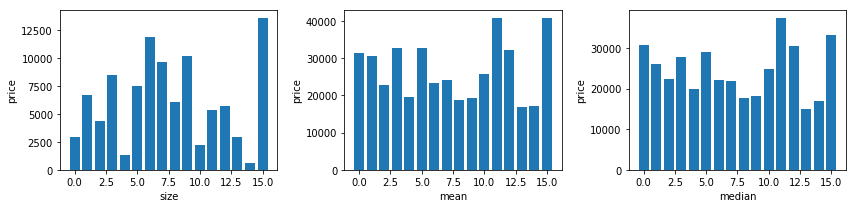

In [21]:
plt.figure(figsize=(12,3))
index = np.arange(len(b_pivot['gu']))

plt.subplot(131)
plt.bar(index, b_pivot['size'])
plt.xlabel("size")
plt.ylabel("price")

plt.subplot(132)
plt.bar(index, b_pivot['mean'])
plt.xlabel("mean")
plt.ylabel("price")

plt.subplot(133)
plt.bar(index, b_pivot['median'])
plt.xlabel("median")
plt.ylabel("price")

plt.tight_layout()
plt.show()

In [22]:
# 서울 : 구 단위

s_si = []
s_gu = []
s_dong = []
for i in range(len(seoul)):
    s = seoul.loc[:,'city'][i].split()
    s_si.append(s[0])
    s_gu.append(s[0] + " " + s[1])
    s_dong.append(s[0] + " " + s[1] + " " + s[2])
print(len(s_si), len(s_gu), len(s_dong))

seoul["si"] = s_si
seoul["gu"] = s_gu
seoul["dong"] = s_dong

seoul.tail(3)

261314 261314 261314


,price,city,se,area,mon,day,floor,build,si,gu,dong
261311,25800,서울특별시 중랑구 중화동,한영(102),57.18,201905,20,6,2003,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동
261312,34500,서울특별시 중랑구 중화동,현대휴앤미,82.17,201901,31,7,2007,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동
261313,32800,서울특별시 중랑구 중화동,현대휴앤미(102동),64.48,201907,15,3,2007,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동


In [23]:
print("null값 확인")
np.sum(pd.isnull(seoul))

null값 확인


price    0
city     0
se       0
area     0
mon      0
day      0
floor    0
build    0
si       0
gu       0
dong     0
dtype: int64

In [24]:
print("<<< 그룹 별 개수, 평균, 중앙값, 표준편차 >>>")
s_pivot = seoul['price'].groupby(seoul['gu']).agg(['size','mean', 'median', 'std'])
s_pivot = s_pivot.reset_index()
print("서울 구 개수:", len(s_pivot))
s_pivot

<<< 그룹 별 개수, 평균, 중앙값, 표준편차 >>>
서울 구 개수: 25


,gu,size,mean,median,std
0,서울특별시 강남구,15399,149020.456913,138000,73618.587151
1,서울특별시 강동구,14053,64545.615740,60000,25658.114798
2,서울특별시 강북구,5182,41823.647433,41000,13117.441508
3,서울특별시 강서구,14852,52401.159305,49800,21559.074645
4,서울특별시 관악구,8510,46358.351469,46800,14958.214791
5,서울특별시 광진구,5554,78199.331293,73000,32127.068860
6,서울특별시 구로구,13010,43824.275865,41900,18583.567048
7,서울특별시 금천구,4573,38179.570741,36000,13637.314760
8,서울특별시 노원구,25911,38599.998186,36000,14159.701431
9,서울특별시 도봉구,11033,35863.965739,33300,13867.126338


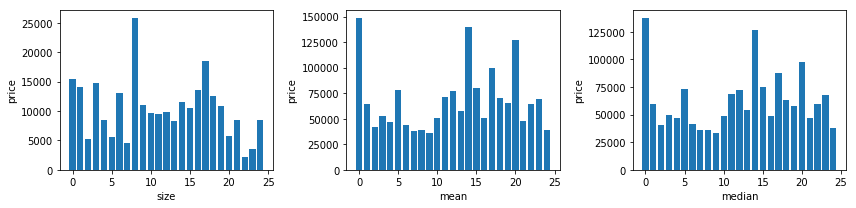

In [25]:
plt.figure(figsize=(12,3))
index = np.arange(len(s_pivot['gu']))

plt.subplot(131)
plt.bar(index, s_pivot['size'])
plt.xlabel("size")
plt.ylabel("price")

plt.subplot(132)
plt.bar(index, s_pivot['mean'])
plt.xlabel("mean")
plt.ylabel("price")

plt.subplot(133)
plt.bar(index, s_pivot['median'])
plt.xlabel("median")
plt.ylabel("price")

plt.tight_layout()
plt.show()

## 4. 2차 데이터 병합 및 통계적 분석

### a. 데이터병합 2

In [26]:
data = pd.concat([busan, seoul])
data.reset_index(drop=True, inplace=True)
print(data.shape)
print(data.columns)
data.tail(3)

(360928, 11)
Index(['price', 'city', 'se', 'area', 'mon', 'day', 'floor', 'build', 'si',
       'gu', 'dong'],
      dtype='object')


,price,city,se,area,mon,day,floor,build,si,gu,dong
360925,25800,서울특별시 중랑구 중화동,한영(102),57.18,201905,20,6,2003,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동
360926,34500,서울특별시 중랑구 중화동,현대휴앤미,82.17,201901,31,7,2007,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동
360927,32800,서울특별시 중랑구 중화동,현대휴앤미(102동),64.48,201907,15,3,2007,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동


### b. 기초통계분석 2

In [27]:
print( data.loc[:, "price"].describe().drop(index=['count','25%','75%']) )

mean     57769.465622
std      46743.861265
min       1000.000000
50%      45800.000000
max     840000.000000
Name: price, dtype: float64


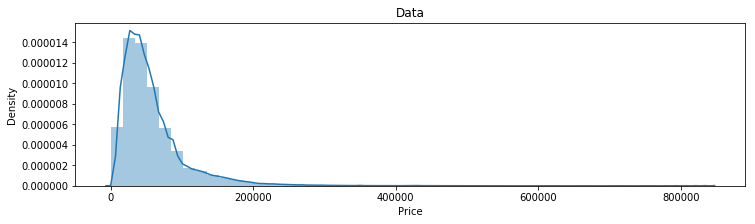

왜도 :  2.96880722232735 : 오른쪽으로 긴 꼬리, (정규분포 = 3)
첨도 :  16.488512394459185 : 양의 첨도(뾰족)


In [28]:
plt.figure(figsize=(12,3))
ax = sns.distplot(data.loc[:,"price"], bins=50)
ax.set_title("Data")
ax.set_xlabel("Price")
ax.set_ylabel("Density")
plt.show()

#sns초기화
sns.set()
sns.reset_orig()

print("왜도 : ",data.loc[:,"price"].skew(), ": 오른쪽으로 긴 꼬리, (정규분포 = 3)")
print("첨도 : ",data.loc[:,"price"].kurt(), ": 양의 첨도(뾰족)")

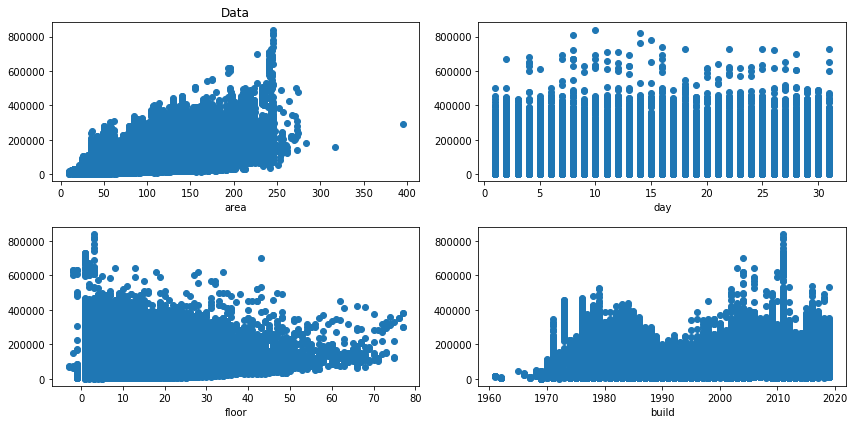

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.title("Data")
plt.scatter(data.loc[:,"area"],data.loc[:,"price"])
plt.xlabel("area")

plt.subplot(222)
plt.scatter(data.loc[:,"day"],data.loc[:,"price"])
plt.xlabel("day")

plt.subplot(223)
plt.scatter(data.loc[:,"floor"],data.loc[:,"price"])
plt.xlabel("floor")

plt.subplot(224)
plt.scatter(data.loc[:,"build"],data.loc[:,"price"])
plt.xlabel("build")

plt.tight_layout()
plt.show()

In [30]:
# 상관성 분석
print("x축을 각 변수, y축을 price로 한 상관성 분석(상관계수)"), print()

print("<<< 전체 >>>")
dc_a = data['area'].corr(data['price'])
dc_f = data['floor'].corr(data['price'])
dc_b = data['build'].corr(data['price'])
dc_m = data['mon'].corr(data['price'])
print("면적 :", dc_a)
print("층 :", dc_f)
print("건축년도 :", dc_b)
print("계약년월 : ", dc_m)

x축을 각 변수, y축을 price로 한 상관성 분석(상관계수)

<<< 전체 >>>
면적 : 0.5688659149893275
층 : 0.11907016062512611
건축년도 : 0.028747520236846923
계약년월 :  0.11625187016285851


 > y축 : 가격
 
 > 전체 : 
  <br> 강한 양의 상관관계 (0.3 < r < 0.7) : 면적(area), 
  <br> 약한 양의 상관관계 (0.1 < r < 0.3) : 층(floor), 계약년월(mon)

## 5. 주식, 환율 데이터 분석

In [31]:
exchange = pd.read_csv("../input/exchange_data.csv", encoding="cp949")
stock = pd.read_csv("../input/stock_data.csv", encoding="cp949")

In [32]:
print(exchange.shape)
exchange.tail(3)

(736, 9)


,날짜,매매기준율,전일대비,현찰살때,현찰팔때,송금보낼때,송금받을때,T/C살때,외화수표팔때
733,2019.12.27,1160.5,1.5,1180.80,1140.20,1171.8,1149.2,1174.42,1148.03
734,2019.12.30,1156.5,4.0,1176.73,1136.27,1167.8,1145.2,1170.37,1144.03
735,2019.12.31,1156.0,0.5,1176.23,1135.77,1167.3,1144.7,1169.87,1143.54


In [33]:
print(stock.shape)
stock.tail(3)

(733, 6)


,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
730,2019.12.26,2197.93,7.85,0.36%,571309,4795109
731,2019.12.27,2204.21,6.28,0.29%,490167,5429665
732,2019.12.30,2197.67,6.54,-0.30%,416403,4113597


In [34]:
e_y = []
e_m = []
e_d = []
for i in range(len(exchange)):
    e = exchange.loc[:,'날짜'][i].split(".")
    e_y.append(e[0])
    e_m.append(e[0] + e[1])
    e_d.append(e[0] + e[1] + e[2])
print(len(e_y), len(e_m), len(e_d))

exchange["yyyy"] = e_y
exchange["mon"] = e_m
exchange["yyyymmdd"] = e_d

exchange[:3]

s_y = []
s_m = []
s_d = []
for i in range(len(stock)):
    s = str(stock.loc[:,'날짜'][i]).split(".")
    s_y.append(e[0])
    s_m.append(e[0] + e[1])
    s_d.append(e[0] + e[1] + e[2])
print(len(s_y), len(s_m), len(s_d))

stock["yyyy"] = s_y
stock["mon"] = s_m
stock["yyyymmdd"] = s_d

print()
print( np.sum(pd.isnull(exchange)) ), print()
print( np.sum(pd.isnull(stock)) )

736 736 736
733 733 733

날짜          0
매매기준율       0
전일대비        0
현찰살때        0
현찰팔때        0
송금보낼때       0
송금받을때       0
T/C살때       0
외화수표팔때      0
yyyy        0
mon         0
yyyymmdd    0
dtype: int64

날짜          0
체결가         0
전일비         0
등락률         0
거래량(천주)     0
거래대금(백만)    0
yyyy        0
mon         0
yyyymmdd    0
dtype: int64


In [35]:
e_pivot = exchange['매매기준율'].groupby(exchange['mon']).agg(['size','mean', 'median', 'std'])
e_pivot = e_pivot.reset_index()

s_pivot = stock['체결가'].groupby(exchange['mon']).agg(['size','mean', 'median', 'std'])
s_pivot = s_pivot.reset_index()

In [36]:
e_pivot.tail(3)

,mon,size,mean,median,std
33,201910,21,1182.995238,1181.0,12.439473
34,201911,21,1168.476190,1167.0,7.955307
35,201912,21,1175.509524,1172.0,14.070604


In [37]:
s_pivot.tail(3)

,mon,size,mean,median,std
33,201910,21,2071.752857,2080.270,27.332943
34,201911,21,2126.201905,2125.320,23.054068
35,201912,18,2153.571111,2180.165,53.955864


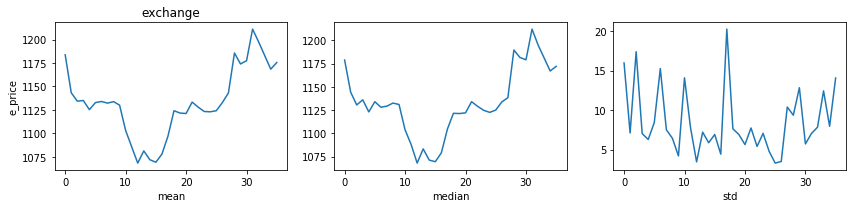

In [38]:
plt.figure(figsize=(12,3))
index = np.arange(len(e_pivot['mon']))

plt.subplot(131)
plt.plot(index, e_pivot['mean'])
plt.title("exchange")
plt.xlabel("mean")
plt.ylabel("e_price")

plt.subplot(132)
plt.plot(index, e_pivot['median'])
plt.xlabel("median")

plt.subplot(133)
plt.plot(index, e_pivot['std'])
plt.xlabel("std")

plt.tight_layout()
plt.show()

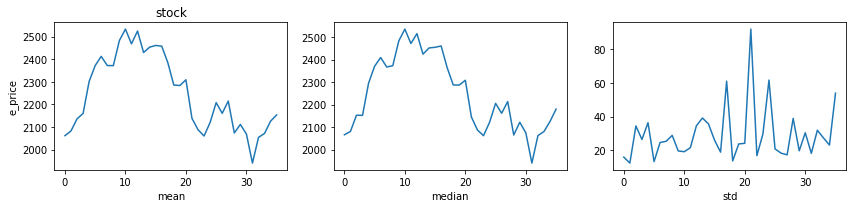

In [39]:
plt.figure(figsize=(12,3))
index = np.arange(len(s_pivot['mon']))

plt.subplot(131)
plt.plot(index, s_pivot['mean'])
plt.title("stock")
plt.xlabel("mean")
plt.ylabel("e_price")

plt.subplot(132)
plt.plot(index, s_pivot['median'])
plt.xlabel("median")

plt.subplot(133)
plt.plot(index, s_pivot['std'])
plt.xlabel("std")

plt.tight_layout()
plt.show()

In [40]:
del e_pivot["size"]
del e_pivot["median"]
del s_pivot["size"]
del s_pivot["median"]

e_pivot.columns = ["mon", "e_mean", "e_std"]
s_pivot.columns = ["mon", "s_mean", "s_std"]

e_pivot = e_pivot.apply(pd.to_numeric, errors='coerce') #.fillna(0)
s_pivot = s_pivot.apply(pd.to_numeric, errors='coerce') #.fillna(0)

In [41]:
s_pivot.tail(3)

,mon,s_mean,s_std
33,201910,2071.752857,27.332943
34,201911,2126.201905,23.054068
35,201912,2153.571111,53.955864


In [42]:
data0 = pd.merge(data, e_pivot, on="mon", how="left") 
data = pd.merge(data0, s_pivot, on="mon", how="left")
data.tail(1)

,price,city,se,area,mon,day,floor,build,si,gu,dong,e_mean,e_std,s_mean,s_std
360927,32800,서울특별시 중랑구 중화동,현대휴앤미(102동),64.48,201907,15,3,2007,서울특별시,서울특별시 중랑구,서울특별시 중랑구 중화동,1177.5,5.726732,2069.206522,30.358757


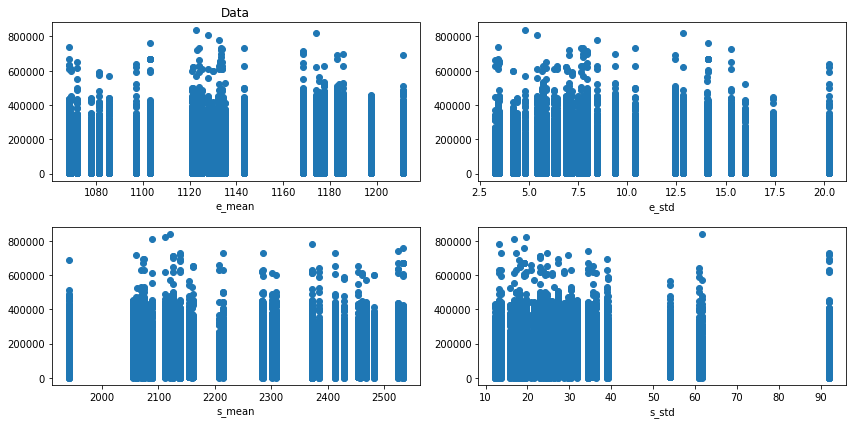

e_mean : 0.07978865670499519
e_std : -0.003948597406702076
s_mean : -0.04515896517043823
s_std :  -0.008948685459303682


In [43]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.title("Data")
plt.scatter(data.loc[:,"e_mean"],data.loc[:,"price"])
plt.xlabel("e_mean")

plt.subplot(222)
plt.scatter(data.loc[:,"e_std"],data.loc[:,"price"])
plt.xlabel("e_std")

plt.subplot(223)
plt.scatter(data.loc[:,"s_mean"],data.loc[:,"price"])
plt.xlabel("s_mean")

plt.subplot(224)
plt.scatter(data.loc[:,"s_std"],data.loc[:,"price"])
plt.xlabel("s_std")

plt.tight_layout()
plt.show()

dc_em = data['e_mean'].corr(data['price'])
dc_es = data['e_std'].corr(data['price'])
dc_sm = data['s_mean'].corr(data['price'])
dc_ss = data['s_std'].corr(data['price'])
print("e_mean :", dc_em)
print("e_std :", dc_es)
print("s_mean :", dc_sm)
print("s_std : ", dc_ss)

 > 월 평균 환율과 부동산가격은 서로 상관이 없음.
 
 > 월 평균 주식거래액과 부동산가격은 서로 상관이 없음.

#### 2_modeling.ipynb 파일을 여세요.
<a href="./2_modeling.ipynb"> ☞ 2번째 파일 바로가기 <a>

[▲처음으로 돌아가기](#목차)